In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/34 no.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/N20.JPG
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/N1.JPG
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/49 no.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/N15.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/No18.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/31 no.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/no 6.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/3 no.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/no 5.jpeg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/no 1.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/26 no.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/N26.JPG
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/N5.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/no/6 no.jpg
/kaggle/inpu

In [2]:
import tensorflow as tf
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dropout, Dense, 
                          Flatten, GlobalAveragePooling2D, BatchNormalization, Activation)
from keras.applications import vgg16

2025-05-09 19:46:04.087581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746819964.323794      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746819964.389846      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
DATASET_PATH = '/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/'
CATEGORIES = ['yes', 'no']
IMG_SIZE = 224

x = []
y = []

for label, category in enumerate(CATEGORIES):
    folder_path = os.path.join(DATASET_PATH, category)
    image_paths = glob.glob(os.path.join(folder_path, '*'))

    for img_path in tqdm(image_paths, desc=f'Loading {category}'):
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            x.append(img)
            y.append(label)
        except:
            continue

x = np.array(x)
y = np.array(y)

Loading yes:   0%|          | 0/155 [00:00<?, ?it/s]

Loading no:   0%|          | 0/98 [00:00<?, ?it/s]

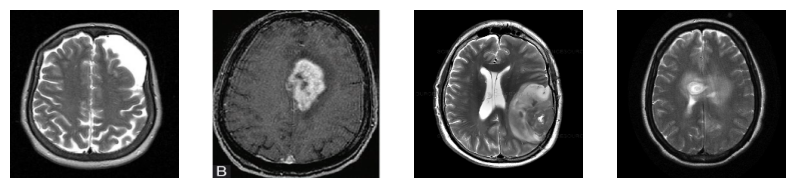

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(x[i])
    plt.axis('off')
plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print("x_train shape:", x_train[0].shape)
print("x_test shape:", x_test[0].shape)

x_train shape: (224, 224, 3)
x_test shape: (224, 224, 3)


In [6]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

x_train = np.array(x_train)
x_test = np.array(x_test)

In [7]:
print("x_train Shape: ", x_train.shape)
print("x_test Shape: ", x_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

x_train Shape:  (169, 224, 224, 3)
x_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


In [8]:
img_rows, img_cols = IMG_SIZE, IMG_SIZE

vgg = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, 3))

# Freeze all layers
for layer in vgg.layers:
    layer.trainable = False

# Display layer information
for i, layer in enumerate(vgg.layers):
    print(f"{i}. {layer.__class__.__name__} - Trainable: {layer.trainable}")

I0000 00:00:1746819980.262059      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
0. InputLayer - Trainable: False
1. Conv2D - Trainable: False
2. Conv2D - Trainable: False
3. MaxPooling2D - Trainable: False
4. Conv2D - Trainable: False
5. Conv2D - Trainable: False
6. MaxPooling2D - Trainable: False
7. Conv2D - Trainable: False
8. Conv2D - Trainable: False
9. Conv2D - Trainable: False
10. MaxPooling2D - Trainable: False
11. Conv2D - Trainable: False
12. Conv2D - Trainable: False
13. Conv2D - Trainable: False
14. MaxPooling2D - Trainable: False
15. Conv2D - Trainable: False
16. Conv2D - Trainable: False
17. Conv2D - Trainable: False
18. MaxPooling2D - Trainable: False


In [9]:
def lw(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

In [10]:
num_classes = 2
FC_Head = lw(vgg, num_classes)
model = Model(inputs=vgg.input, outputs=FC_Head)

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,3

 Total params: 16,815,426 (64.15 MB)

 Trainable params: 2,100,738 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
batch_size = 6  
history = model.fit(x_train, y_train,
    epochs=100,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/100


I0000 00:00:1746819988.752128      61 service.cc:148] XLA service 0x788e38003a90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746819988.752783      61 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746819989.128249      61 cuda_dnn.cc:529] Loaded cuDNN version 90300


10/29 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4914 - loss: 5.1158

I0000 00:00:1746819992.350218      61 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.5491 - loss: 3.9438 - val_accuracy: 0.8333 - val_loss: 0.4389
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8891 - loss: 0.3226 - val_accuracy: 0.8214 - val_loss: 0.4611
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9413 - loss: 0.2199 - val_accuracy: 0.8095 - val_loss: 0.4727
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9704 - loss: 0.0726 - val_accuracy: 0.8452 - val_loss: 0.6218
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9861 - loss: 0.0606 - val_accuracy: 0.8214 - val_loss: 0.5866
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9704 - loss: 0.0853 - val_accuracy: 0.8810 - val_loss: 0.4986
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9988 - loss: 0.0039 - val_accuracy: 0.8571 - val_loss: 0.7963
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 0.0093 - val_accuracy: 0.8214 - val_

##### acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

In [13]:
model.save("brain_tumor_classifier.h5")
print("saved...")

saved...
